In [1]:
import numpy as np
import matplotlib.pyplot as plt

import qutip as qt

import sim_utils as su

MHz = 1. # work in units of MHz
pi = np.pi

In [21]:
### system parameters
K = 2. * pi * 6. * MHz # Kerr nonlinearity
e_4 = 8. * 2. * pi * 15.5 * MHz # four-photon drive strength
n_th = 0.0 # population of n=1 Fock state due to thermal noise
print("alpha =", (e_4 / K)**0.25)

### drive parameters
tau = 320.0e-3 / MHz # drive ramp time, ns

### simulation parameters
N = 20 # dimensionality of the Hilbert space, per resonator
tmax = 1. / MHz # go for 1 μs
dt = 1.0e-3 / MHz

### get the encoded basis states
psi_00, psi_01 = su.cat_states(K, np.sqrt(e_4), N)
psi_10, psi_11 = su.cat_states(K, 1.0j * np.sqrt(e_4), N)

### define the Hamiltonian
H = [su.H_kerr(K, N), su.H_4ph(e_4, N, strength_factor=su.tanh_ramp(tau, 0.))]

alpha = 2.1321492831558375


In [22]:
t = np.arange(0., tmax, dt)

### initialize to the ground state
psi_init = (1. - n_th) * qt.basis(N, 0) + n_th * qt.basis(N, 1)
#psi_init = (psi_00 + psi_10) / np.sqrt(2.)
rho_init = psi_init * psi_init.dag()

result = qt.mesolve(H, rho_init, t, options=qt.Options(store_states=True))

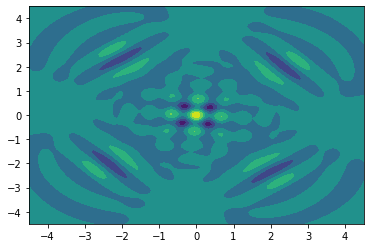

In [23]:
x = np.linspace(-4.5, 4.5, 100)
plt.contourf(x, x, qt.wigner(result.states[-1], x, x))

In [ ]:
P0 = np.array([su.calculate_prob(rho, psi_0, N) for rho in result.states])

plt.plot(t, P0)
plt.plot(t, su.tanh_ramp(tau, 0.)(t, _))
print(P0[-1])